# Description

It reads GWAS files and verifies that the Manhattan and QQ-plots look fine (without inflation).

# Modules

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





# Paths

In [3]:
DATA_DIR <- Sys.getenv("PHENOPLIER_PROJECTS_ASTHMA_COPD_DATA_DIR")

In [4]:
DATA_DIR

[1] "/opt/data/projects/asthma-copd/data"

In [5]:
INPUT_GWAS_DIR <- file.path(DATA_DIR, "gwas")

In [6]:
INPUT_GWAS_DIR

[1] "/opt/data/projects/asthma-copd/data/gwas"

# Asthma only

In [7]:
gwas_title <- "Asthma only"

## Load data

In [8]:
gwas <- as.data.frame(read_table(file.path(INPUT_GWAS_DIR, "GWAS_Asthma_only_GLM_SNPs_info0.7.txt")))


── Column specification ────────────────────────────────────────────────────────
cols(
  `#CHROM` = col_double(),
  POS = col_double(),
  ID = col_character(),
  REF = col_character(),
  ALT = col_character(),
  A1 = col_character(),
  `FIRTH?` = col_character(),
  TEST = col_character(),
  OBS_CT = col_double(),
  OR = col_double(),
  `LOG(OR)_SE` = col_double(),
  L95 = col_double(),
  U95 = col_double(),
  Z_STAT = col_double(),
  P = col_double()
)



In [9]:
dim(gwas)

[1] 8512104      15

In [10]:
head(gwas)

,#CHROM,POS,ID,REF,ALT,A1,FIRTH?,TEST,OBS_CT,OR,LOG(OR)_SE,L95,U95,Z_STAT,P
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,60684,rs569167217,A,C,C,N,ADD,181862,0.982598,0.0401368,0.908262,1.06302,-0.437391,0.661828
2,10,61331,rs548639866,A,G,G,N,ADD,181862,0.984485,0.0400840,0.910101,1.06495,-0.390097,0.696465
3,10,63213,rs542543788,G,C,C,N,ADD,181862,0.982598,0.0401368,0.908262,1.06302,-0.437391,0.661828
4,10,64869,rs556434813,C,A,A,N,ADD,181862,0.951455,0.0543699,0.855280,1.05844,-0.915265,0.360052
5,10,66326,rs12260013,A,G,G,N,ADD,181862,0.959199,0.0370780,0.891965,1.03150,-1.123490,0.261230
6,10,67193,rs182646175,C,T,T,N,ADD,181862,0.976851,0.0405684,0.902187,1.05769,-0.577316,0.563726


In [11]:
gwas <- gwas %>% filter(P >= 0 & P <= 1)

In [12]:
dim(gwas)

[1] 8512104      15

## Stats

In [13]:
summary(gwas)

     #CHROM            POS                 ID                REF           
 Min.   : 1.000   Min.   :      828   Length:8512104     Length:8512104    
 1st Qu.: 4.000   1st Qu.: 32059573   Class :character   Class :character  
 Median : 8.000   Median : 68769672   Mode  :character   Mode  :character  
 Mean   : 8.667   Mean   : 78466571                                        
 3rd Qu.:13.000   3rd Qu.:114287448                                        
 Max.   :22.000   Max.   :249232965                                        
     ALT                 A1               FIRTH?              TEST          
 Length:8512104     Length:8512104     Length:8512104     Length:8512104    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
      

## Manhattan plot

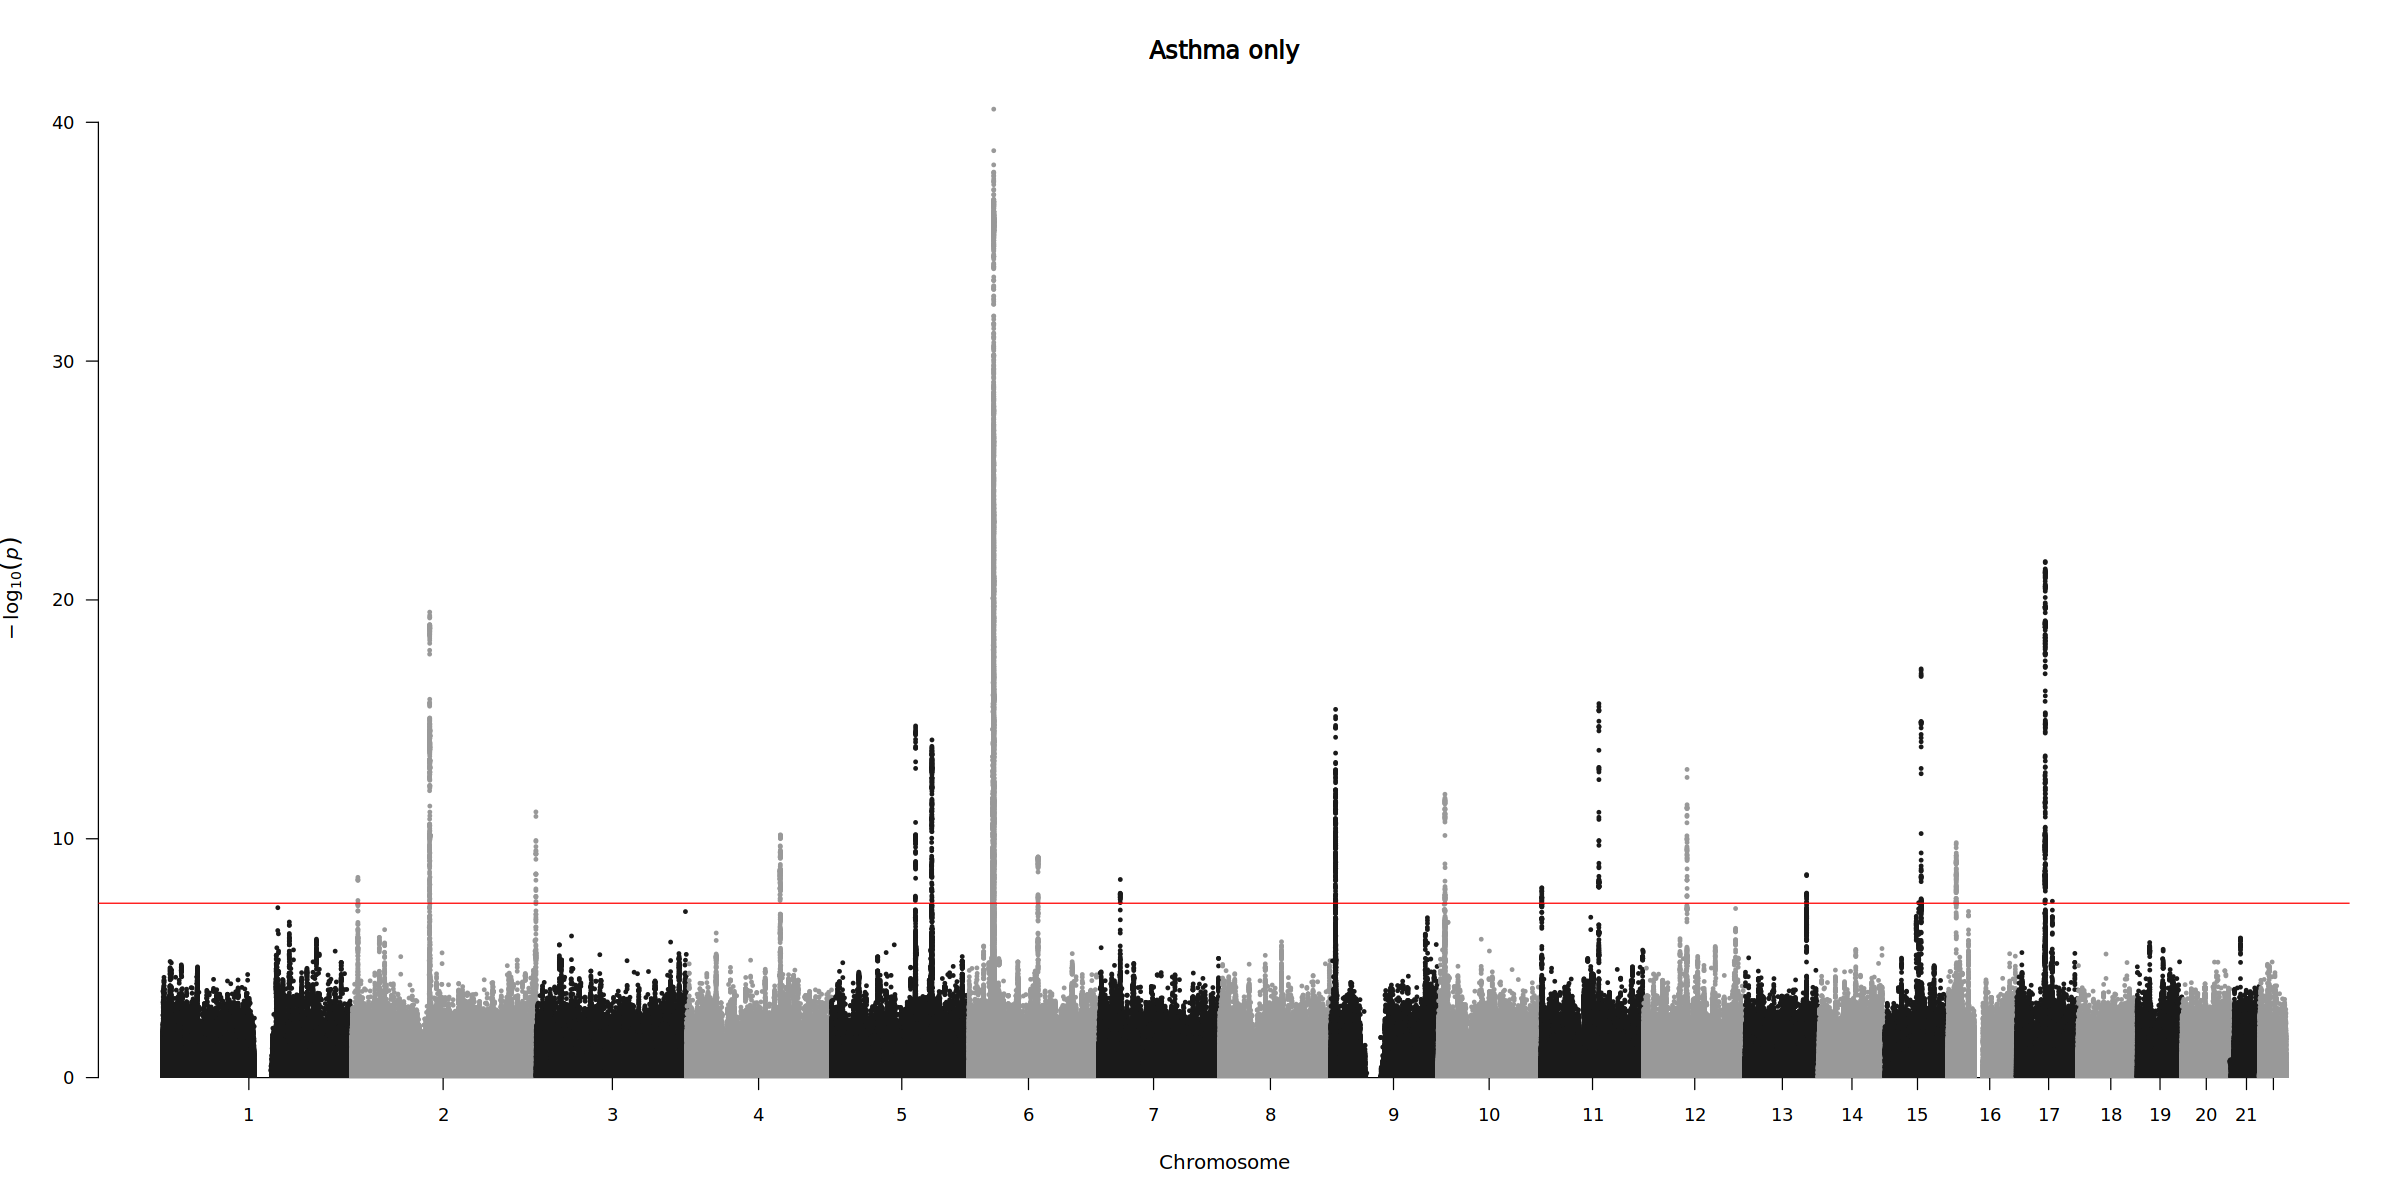

In [14]:
options(repr.plot.width = 20, repr.plot.height = 10)

manhattan(
  gwas,
  chr = "#CHROM",
  bp = "POS",
  p = "P",
  snp = "ID",
  main = gwas_title,
  suggestiveline = F,
  genomewideline = -log10(5e-08),
  cex = 0.6,
  cex.axis = 0.9,
)

## QQ-plot

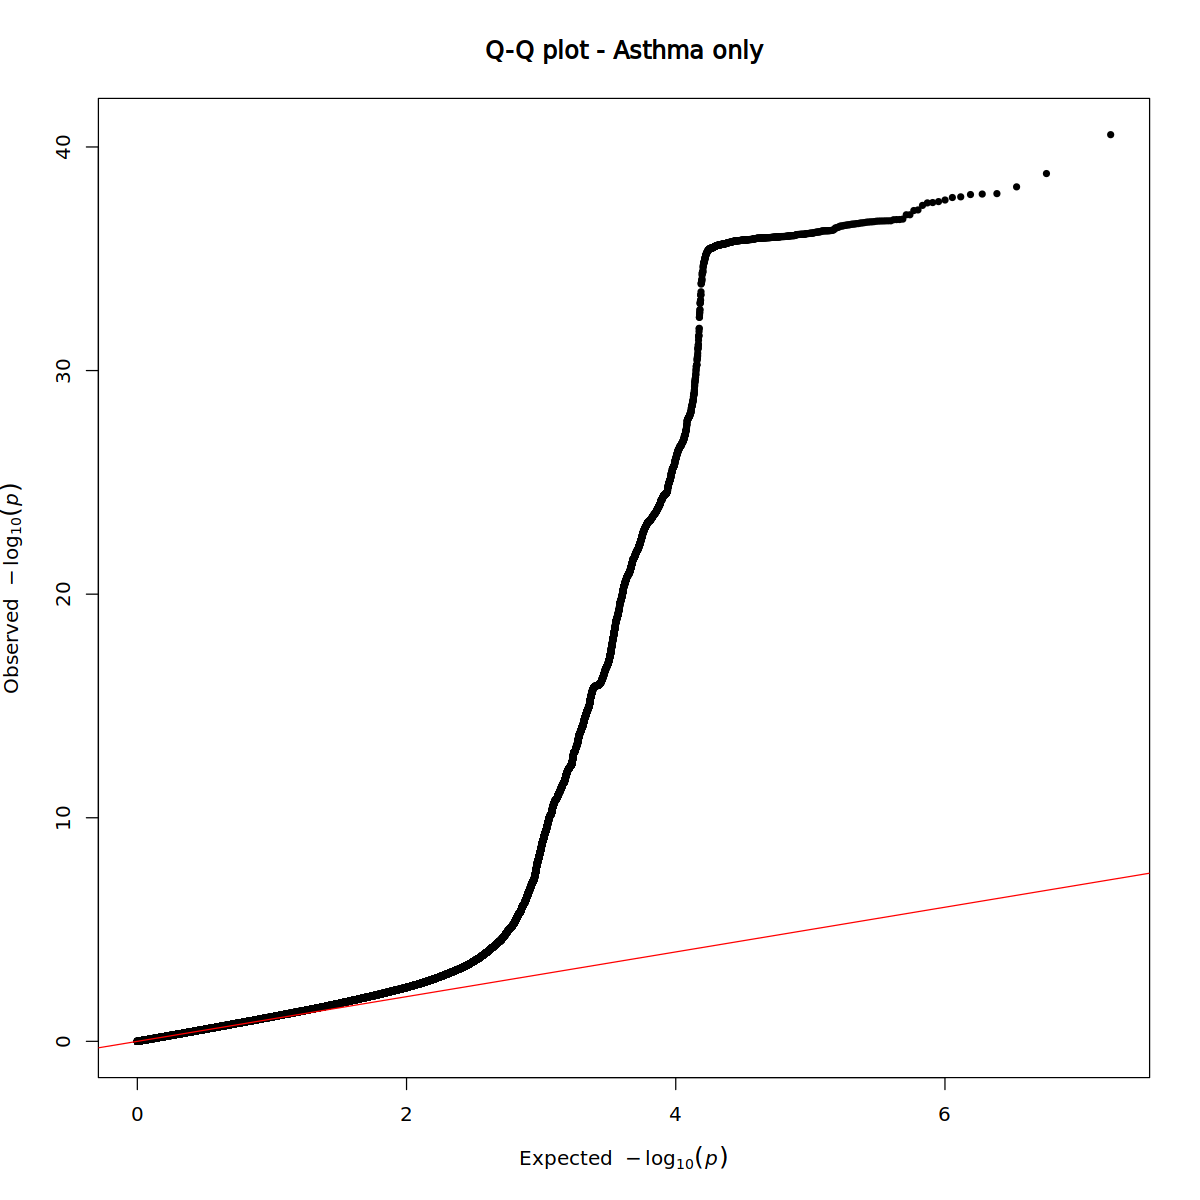

In [15]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(
  gwas$P,
  main = paste0("Q-Q plot - ", gwas_title)
)

# COPD only

In [16]:
gwas_title <- "COPD only"

## Load data

In [17]:
gwas <- as.data.frame(read_table(file.path(INPUT_GWAS_DIR, "GWAS_COPD_only_GLM_SNPs_info0.7.txt")))


── Column specification ────────────────────────────────────────────────────────
cols(
  `#CHROM` = col_double(),
  POS = col_double(),
  ID = col_character(),
  REF = col_character(),
  ALT = col_character(),
  A1 = col_character(),
  `FIRTH?` = col_character(),
  TEST = col_character(),
  OBS_CT = col_double(),
  OR = col_double(),
  `LOG(OR)_SE` = col_double(),
  L95 = col_double(),
  U95 = col_double(),
  Z_STAT = col_double(),
  P = col_double()
)



In [18]:
dim(gwas)

[1] 8512172      15

In [19]:
head(gwas)

,#CHROM,POS,ID,REF,ALT,A1,FIRTH?,TEST,OBS_CT,OR,LOG(OR)_SE,L95,U95,Z_STAT,P
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,60684,rs569167217,A,C,C,N,ADD,175700,0.979958,0.0485303,0.891042,1.07775,-0.4171760,0.676550
2,10,61331,rs548639866,A,G,G,N,ADD,175700,0.980732,0.0484940,0.891810,1.07852,-0.4011970,0.688275
3,10,63213,rs542543788,G,C,C,N,ADD,175700,0.979958,0.0485303,0.891042,1.07775,-0.4171760,0.676550
4,10,64869,rs556434813,C,A,A,N,ADD,175700,0.980209,0.0649217,0.863093,1.11322,-0.3078940,0.758163
5,10,66326,rs12260013,A,G,G,N,ADD,175700,0.998193,0.0441233,0.915496,1.08836,-0.0409914,0.967303
6,10,67193,rs182646175,C,T,T,N,ADD,175700,0.974696,0.0490358,0.885381,1.07302,-0.5226670,0.601206


In [20]:
gwas <- gwas %>% filter(P >= 0 & P <= 1)

In [21]:
dim(gwas)

[1] 8512172      15

## Stats

In [22]:
summary(gwas)

     #CHROM            POS                 ID                REF           
 Min.   : 1.000   Min.   :      828   Length:8512172     Length:8512172    
 1st Qu.: 4.000   1st Qu.: 32057976   Class :character   Class :character  
 Median : 8.000   Median : 68767994   Mode  :character   Mode  :character  
 Mean   : 8.667   Mean   : 78463149                                        
 3rd Qu.:13.000   3rd Qu.:114280734                                        
 Max.   :22.000   Max.   :249232965                                        
     ALT                 A1               FIRTH?              TEST          
 Length:8512172     Length:8512172     Length:8512172     Length:8512172    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
      

## Manhattan plot

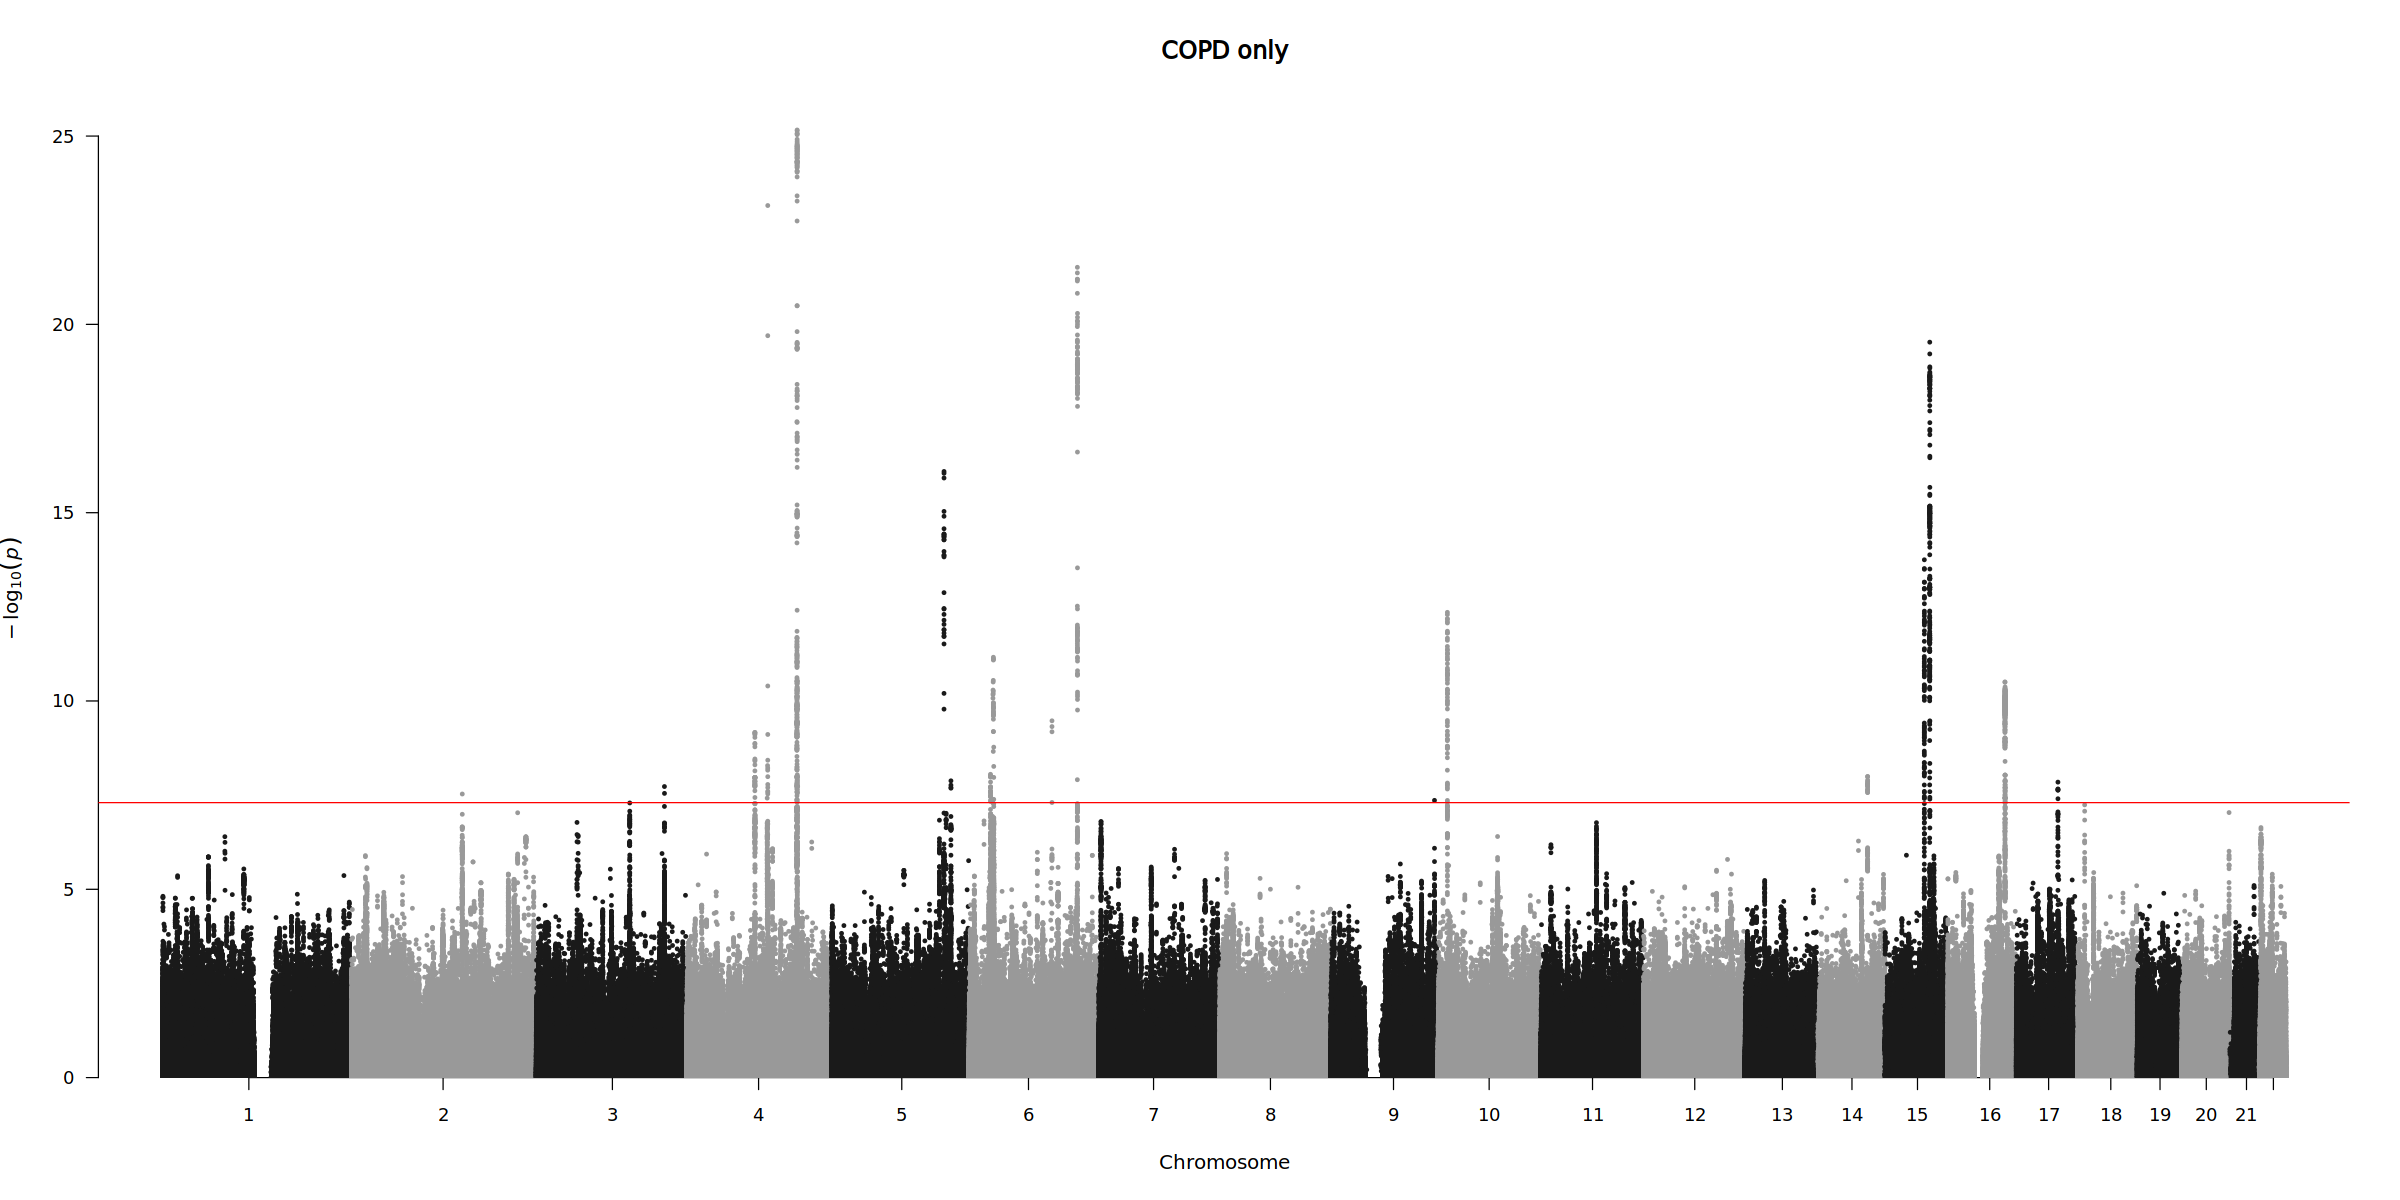

In [23]:
options(repr.plot.width = 20, repr.plot.height = 10)

manhattan(
  gwas,
  chr = "#CHROM",
  bp = "POS",
  p = "P",
  snp = "ID",
  main = gwas_title,
  suggestiveline = F,
  genomewideline = -log10(5e-08),
  cex = 0.6,
  cex.axis = 0.9,
)

## QQ-plot

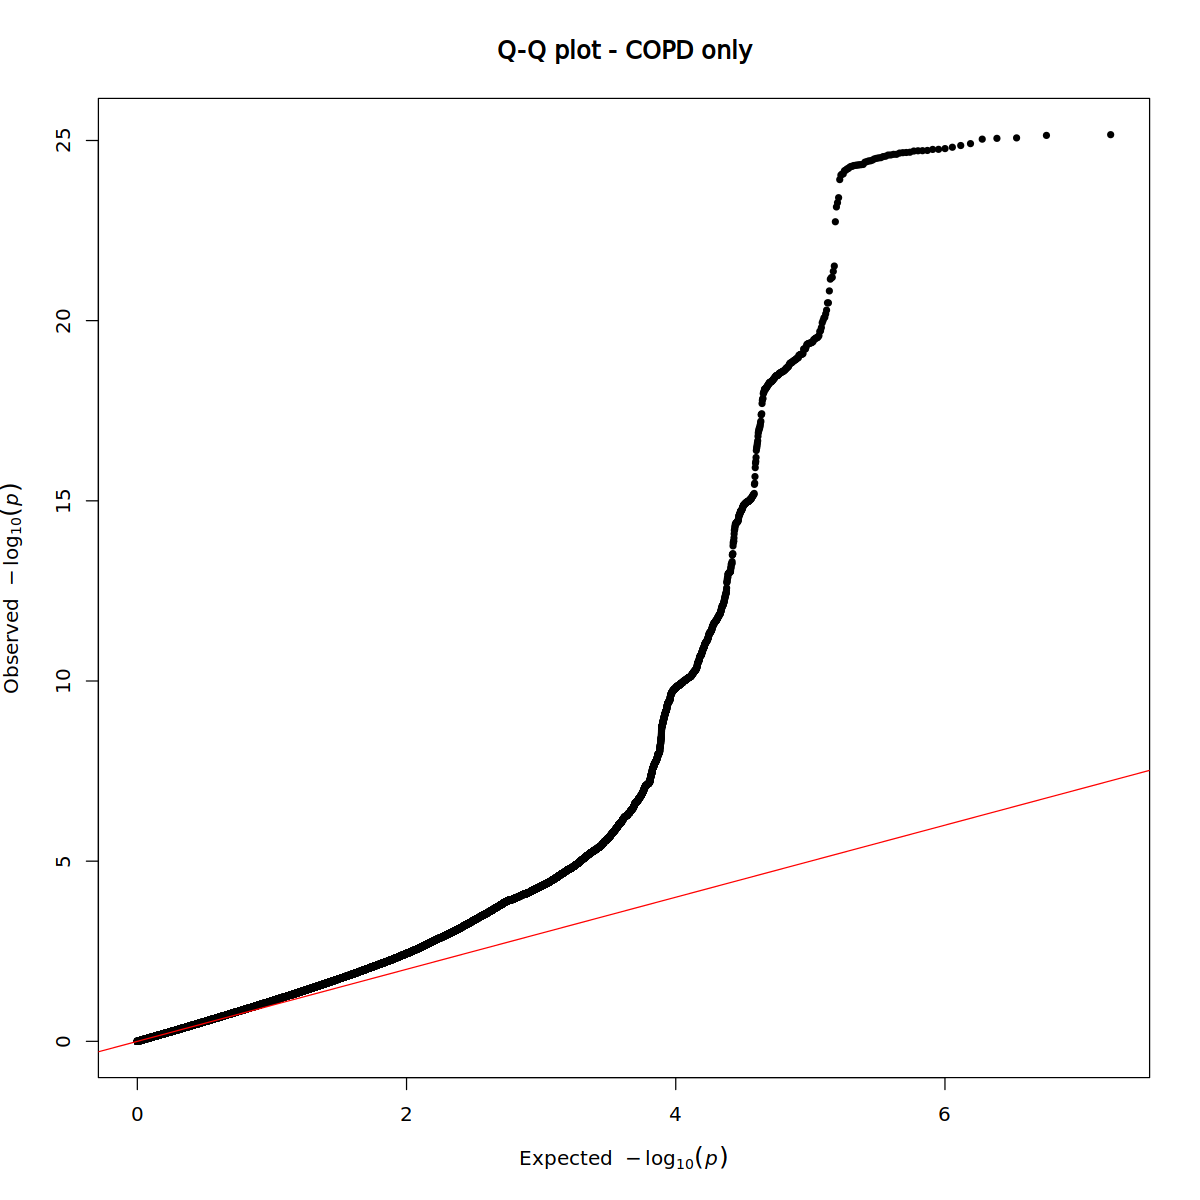

In [24]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(
  gwas$P,
  main = paste0("Q-Q plot - ", gwas_title)
)

# Asthma-COPD Overlap Syndrome (ACOS)

In [25]:
gwas_title <- "ACOS"

## Load data

In [26]:
gwas <- as.data.frame(read_table(file.path(INPUT_GWAS_DIR, "GWAS_ACO_GLM_SNPs_info0.7.txt")))


── Column specification ────────────────────────────────────────────────────────
cols(
  `#CHROM` = col_double(),
  POS = col_double(),
  ID = col_character(),
  REF = col_character(),
  ALT = col_character(),
  A1 = col_character(),
  `FIRTH?` = col_character(),
  TEST = col_character(),
  OBS_CT = col_double(),
  OR = col_double(),
  `LOG(OR)_SE` = col_double(),
  L95 = col_double(),
  U95 = col_double(),
  Z_STAT = col_double(),
  P = col_double()
)



In [27]:
dim(gwas)

[1] 8512179      15

In [28]:
head(gwas)

,#CHROM,POS,ID,REF,ALT,A1,FIRTH?,TEST,OBS_CT,OR,LOG(OR)_SE,L95,U95,Z_STAT,P
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,60684,rs569167217,A,C,C,N,ADD,169680,1.038160,0.0629672,0.917626,1.17452,0.594731,0.552023
2,10,61331,rs548639866,A,G,G,N,ADD,169680,1.037200,0.0629586,0.916791,1.17341,0.580072,0.561866
3,10,63213,rs542543788,G,C,C,N,ADD,169680,1.038160,0.0629672,0.917626,1.17452,0.594731,0.552023
4,10,64869,rs556434813,C,A,A,N,ADD,169680,1.053000,0.0837409,0.893607,1.24082,0.616667,0.537454
5,10,66326,rs12260013,A,G,G,N,ADD,169680,0.940703,0.0598820,0.836529,1.05785,-1.020800,0.307349
6,10,67193,rs182646175,C,T,T,N,ADD,169680,1.044110,0.0633476,0.922202,1.18214,0.681445,0.495590


In [29]:
gwas <- gwas %>% filter(P >= 0 & P <= 1)

In [30]:
dim(gwas)

[1] 8512179      15

## Stats

In [31]:
summary(gwas)

     #CHROM            POS                 ID                REF           
 Min.   : 1.000   Min.   :      828   Length:8512179     Length:8512179    
 1st Qu.: 4.000   1st Qu.: 32059965   Class :character   Class :character  
 Median : 8.000   Median : 68768808   Mode  :character   Mode  :character  
 Mean   : 8.667   Mean   : 78465129                                        
 3rd Qu.:13.000   3rd Qu.:114282862                                        
 Max.   :22.000   Max.   :249232965                                        
     ALT                 A1               FIRTH?              TEST          
 Length:8512179     Length:8512179     Length:8512179     Length:8512179    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
      

## Manhattan plot

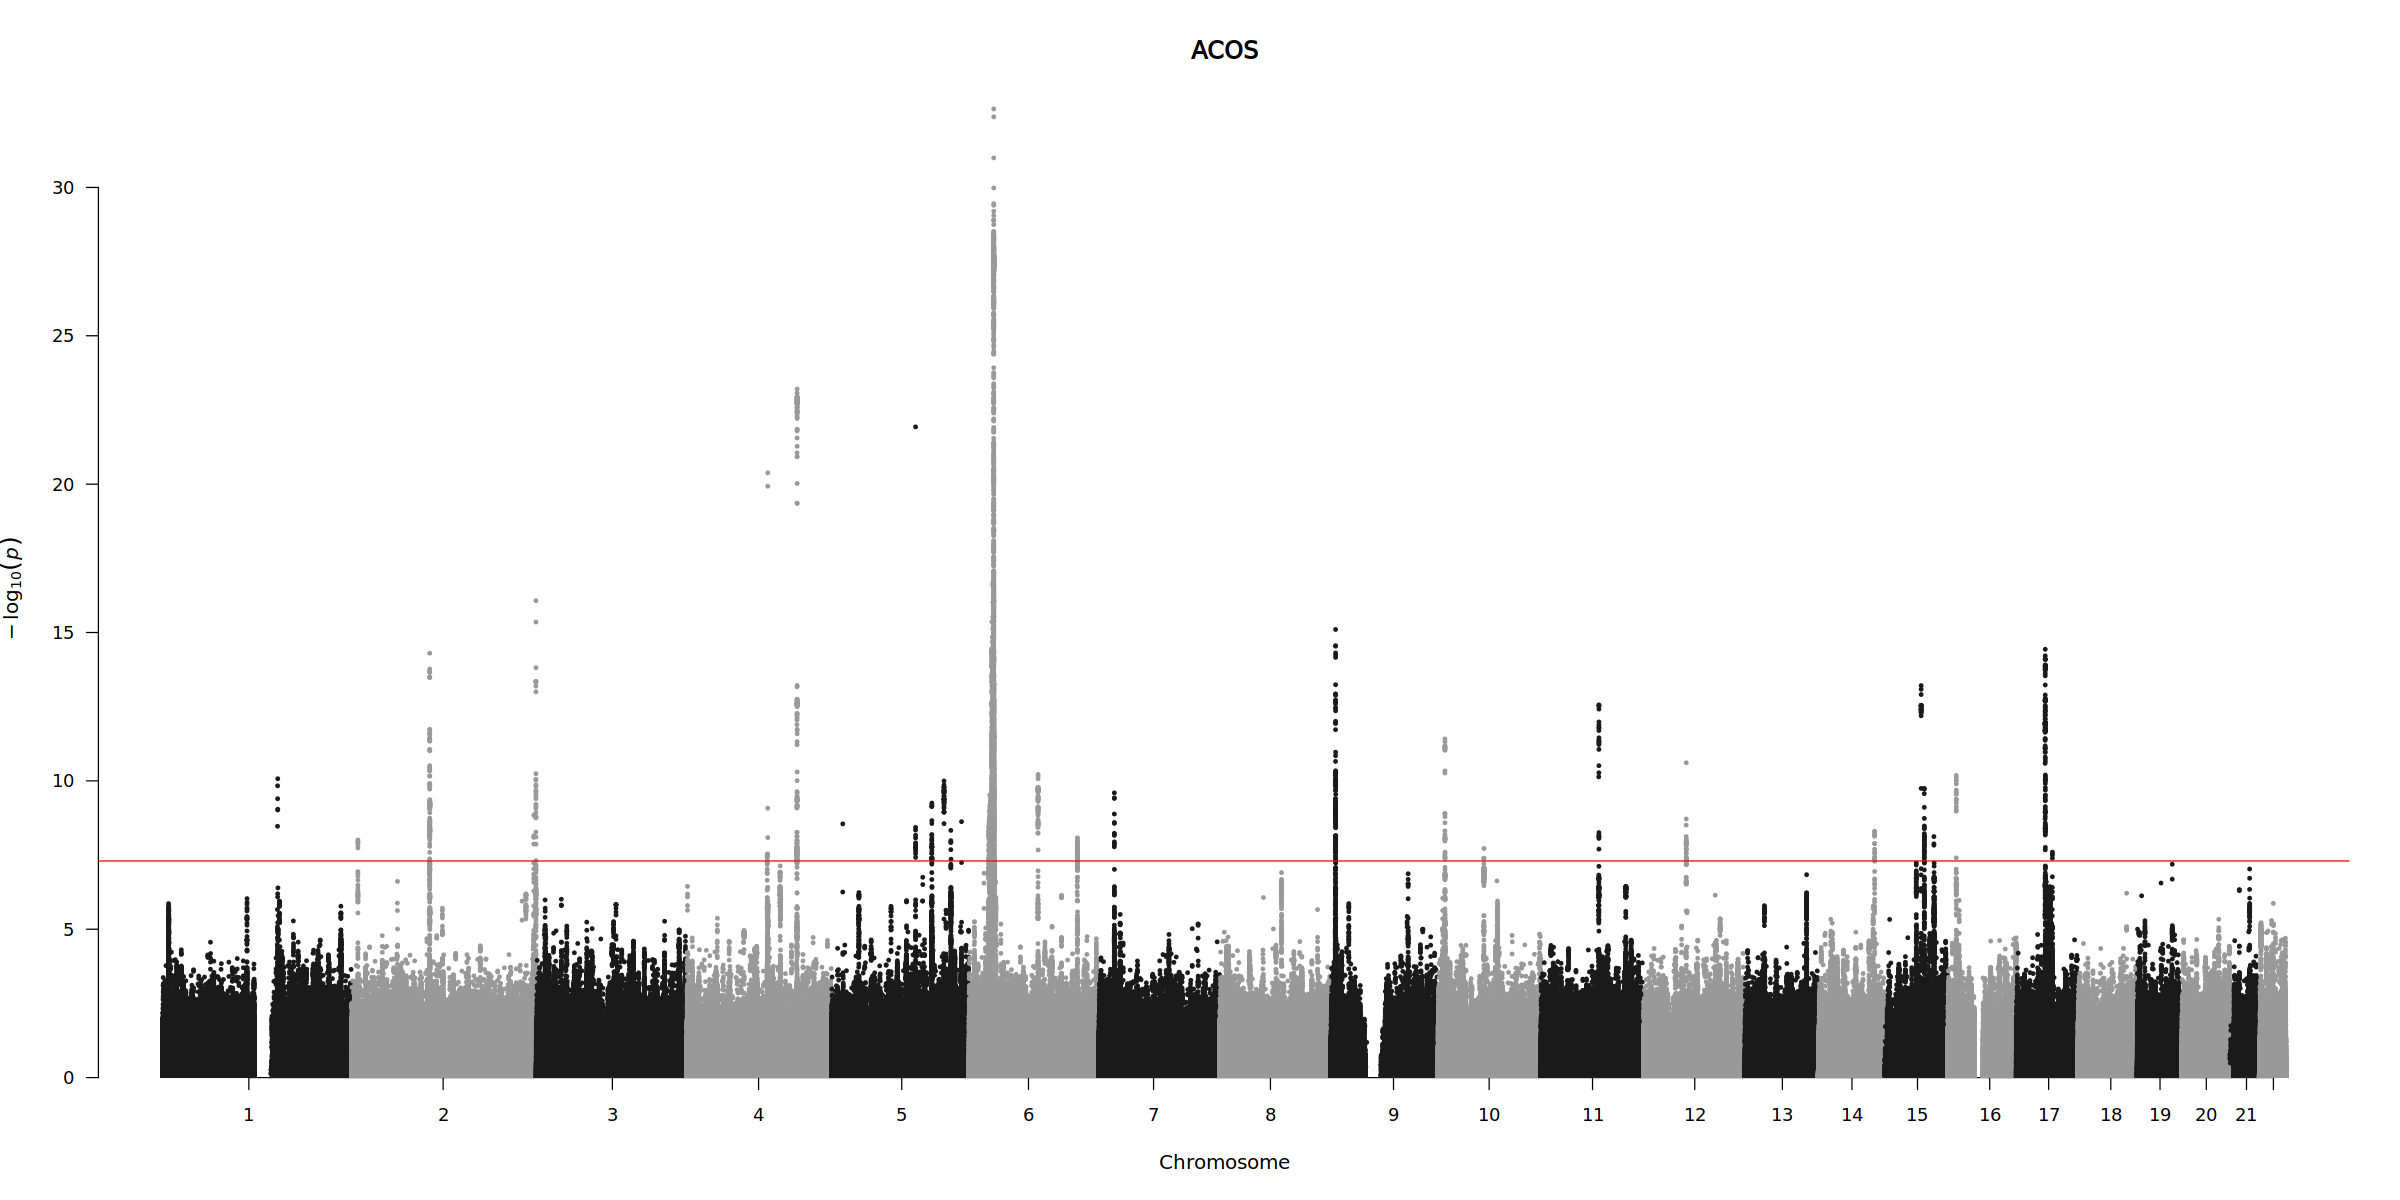

In [32]:
options(repr.plot.width = 20, repr.plot.height = 10)

manhattan(
  gwas,
  chr = "#CHROM",
  bp = "POS",
  p = "P",
  snp = "ID",
  main = gwas_title,
  suggestiveline = F,
  genomewideline = -log10(5e-08),
  cex = 0.6,
  cex.axis = 0.9,
)

## QQ-plot

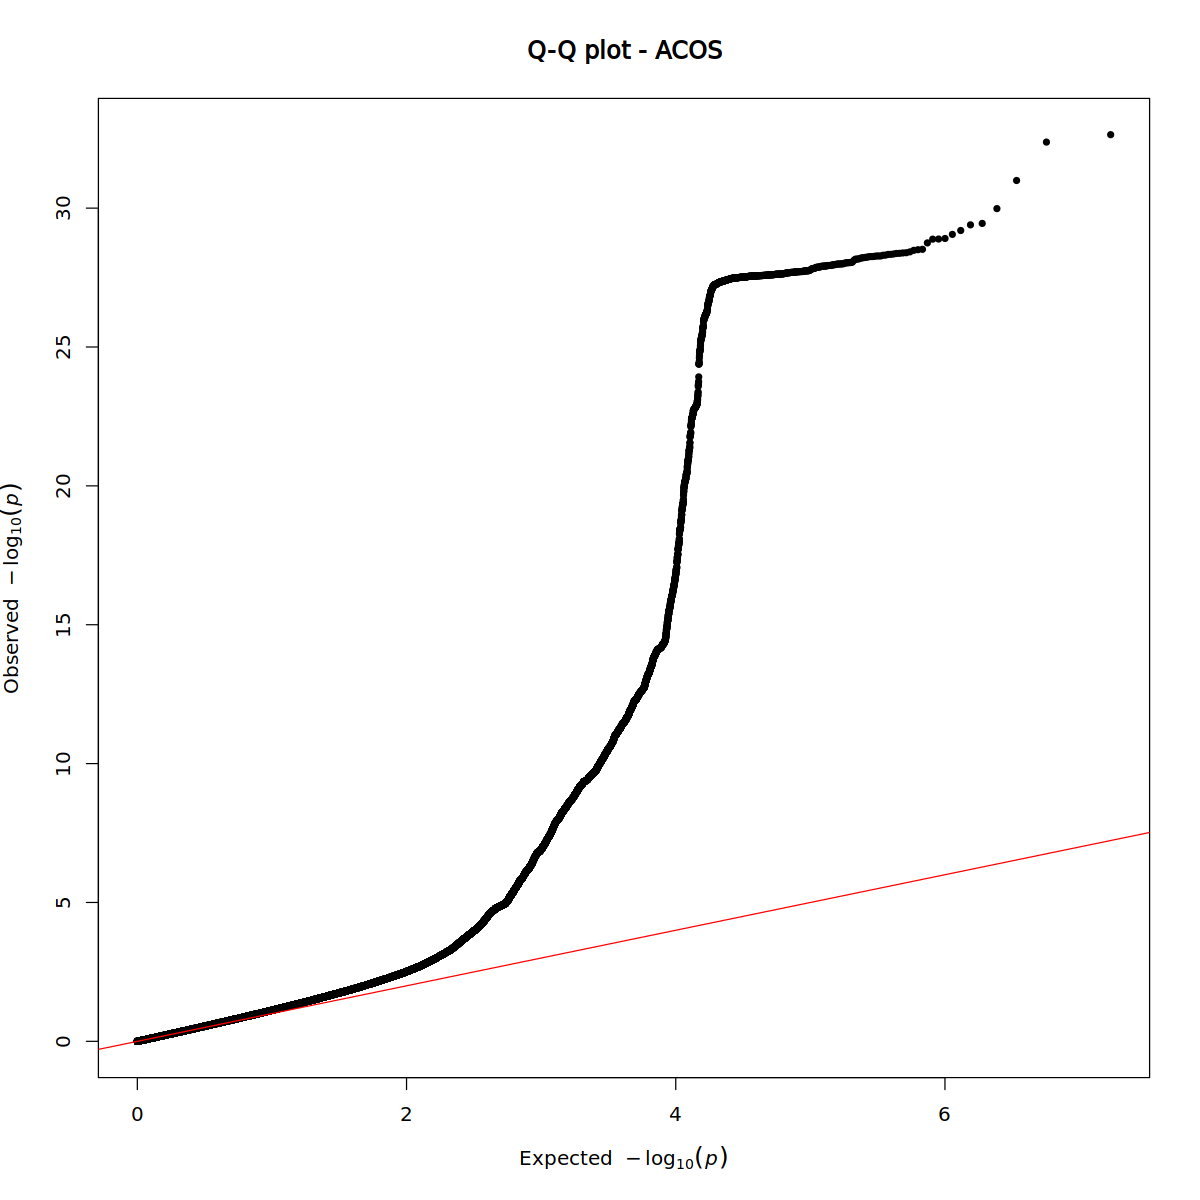

In [33]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(
  gwas$P,
  main = paste0("Q-Q plot - ", gwas_title)
)